# Dissertation 

## Part 1 - Importing libraries, discovering datasets, plotting samples

### Import the necessary libraries

Imports the libraries needed for training, testing, hyperparameter tuning and obtaining the evaluation metrics of the MLP and CNN models on the EMNIST dataset. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from pandarallel import pandarallel

from housedatautils import HousingDataLoader
from housedatautils import HousingDataAnalysis
from housedatautils import GeoDataJSONLoader
from housedatautils import ColourizePredictionsDataset
from housedatautils import PropertyPriceMapPlotter

import warnings

# Temporarily ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


### Import the developed packages

- housedatautils: modules to process and analyse the datasets before and after model training
- housedanodels: models... to be continued

In [3]:
house_data_loader = await HousingDataLoader()
house_data = await house_data_loader.load_uk_data()

geo_data_loader = await GeoDataJSONLoader()
geo_data = await geo_data_loader.load_uk_data()
house_da = HousingDataAnalysis(house_data)

postcode_mapping = house_da.load_cached_data("postcode_mapping.pkl")

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
Pickle data loaded correctly from: preload/housing_data.pkl
Loaded cached data using pickle.
Pickle data loaded correctly from: preload/geo_data.pkl
Loaded cached data using pickle.
Pickle data loaded correctly from: preload/ postcode_mapping.pkl


In [4]:
# geo_data['Postcode_prefix'] = geo_data['Postcode'].parallel_apply(
#             lambda x: x[0] if x[1].isdigit() else x[:2]
#         )
# geo_data = geo_data[geo_data["Postcode_prefix"] == "OX"]
# geo_data

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5259207 entries, 8228918 to 9497493
Data columns (total 20 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Price                   float64 
 1   Postcode                object  
 2   Old_New                 bool    
 3   Town_City               object  
 4   County                  object  
 5   Year                    int64   
 6   Month                   int64   
 7   Property_Type           object  
 8   Postcode_encoded        int64   
 9   Avg num of parks        float64 
 10  Rate                    float64 
 11  Inflation rate          float64 
 12  Number_of_crimes        float64 
 13  Nearest Station <3 km   int64   
 14  Nearest Park <3 km      int64   
 15  Nearest Airport <20 km  int64   
 16  Crimes_Buffer           float64 
 17  Original Price          float64 
 18  Postcode_prefix         object  
 19  Price Group             category
dtypes: bool(1), category(1), float64(7), int

In [6]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1442821 entries, 0 to 1697332
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   mapit_code       1442821 non-null  object  
 1   Postcode         1442821 non-null  object  
 2   geometry         1442821 non-null  geometry
 3   Postcode_prefix  1442821 non-null  object  
dtypes: geometry(1), object(3)
memory usage: 55.0+ MB


In [7]:
house_data.head()

,Price,Postcode,Old_New,Town_City,County,Year,Month,Property_Type,Postcode_encoded,Avg num of parks,Rate,Inflation rate,Number_of_crimes,Nearest Station <3 km,Nearest Park <3 km,Nearest Airport <20 km,Crimes_Buffer,Original Price,Postcode_prefix,Price Group
8228918,11.456366,B16 8EP,False,BIRMINGHAM,WEST MIDLANDS,2018,6,F,9599,2.342857,0.75,2.3,0.0,1,1,1,1092.0,94500.0,B,50k-100k
1904956,12.441149,B16 8EY,False,BIRMINGHAM,WEST MIDLANDS,2018,8,F,9606,4.666667,0.75,2.3,0.0,1,1,1,1092.0,253000.0,B,200k-500k
1892182,11.915058,B16 8EQ,False,BIRMINGHAM,WEST MIDLANDS,2018,11,F,9600,4.784615,0.75,2.3,364.0,1,1,1,1092.0,149500.0,B,100k-200k
5607563,11.923385,B16 8EX,False,BIRMINGHAM,WEST MIDLANDS,2018,1,F,9605,2.342857,0.75,2.3,0.0,1,1,1,1092.0,150750.0,B,100k-200k
1897828,11.002117,B16 8EW,False,BIRMINGHAM,WEST MIDLANDS,2018,10,F,9604,2.342857,0.75,2.3,0.0,1,1,1,1092.0,60000.0,B,50k-100k


In [8]:
geo_data.head()

,mapit_code,Postcode,geometry,Postcode_prefix
0,HX20AA,HX2 0AA,"POLYGON ((-1.89578 53.72234, -1.89581 53.72235...",HX
1,HX20AB,HX2 0AB,"POLYGON ((-1.89743 53.72306, -1.89749 53.72297...",HX
2,HX20AD,HX2 0AD,"POLYGON ((-1.89631 53.72102, -1.89630 53.72119...",HX
3,HX20AE,HX2 0AE,"POLYGON ((-1.89983 53.72276, -1.89967 53.72247...",HX
4,HX20AG,HX2 0AG,"POLYGON ((-1.90024 53.72276, -1.90017 53.72224...",HX


In [9]:
house_data.isnull().sum()

Price                     0
Postcode                  0
Old_New                   0
Town_City                 0
County                    0
Year                      0
Month                     0
Property_Type             0
Postcode_encoded          0
Avg num of parks          0
Rate                      0
Inflation rate            0
Number_of_crimes          0
Nearest Station <3 km     0
Nearest Park <3 km        0
Nearest Airport <20 km    0
Crimes_Buffer             0
Original Price            0
Postcode_prefix           0
Price Group               0
dtype: int64

In [10]:
print('Number of cities:', house_data['Town_City'].nunique())

Number of cities: 974


In [11]:
house_data.groupby('Year')['Original Price'].agg(['min', 'max'])

,min,max
Year,,
2008,520.0,23500000.0
2009,275.0,13800000.0
2010,100.0,16200000.0
2011,100.0,73206100.0
2012,400.0,54959000.0
2013,100.0,94390560.0
2014,100.0,132500000.0
2015,100.0,225000000.0
2016,1.0,370000000.0


## Part 2 - Data Analysis

In [12]:
house_da.show_price_categories()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0-5k,5k-20k,20k-50k,50k-100k,100k-200k,200k-500k,500k-750k,750k-1m,1m-1.5m,1.5m-2.5m,2.5m-5m,5m-10m,10m-50m,50m-100m,100m+


In [13]:
temp_house_data = house_da.remove_cheap_exp_groups(house_data, 
# temp_house_data = house_da.remove_cheap_exp_groups(house_data[house_data["Town_City"] == "WOODSTOCK"], 
                                                   cheapest_group="20k-50k",
                                                   expensive_group="1.5m-2.5m")
 
house_da.data = temp_house_data
house_da.show_price_categories()

,0,1,2,3,4,5,6
0,20k-50k,50k-100k,100k-200k,200k-500k,500k-750k,750k-1m,1m-1.5m


In [14]:
temp_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189615 entries, 8228918 to 3166565
Data columns (total 20 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Price                   float64 
 1   Postcode                object  
 2   Old_New                 bool    
 3   Town_City               object  
 4   County                  object  
 5   Year                    int64   
 6   Month                   int64   
 7   Property_Type           object  
 8   Postcode_encoded        int64   
 9   Avg num of parks        float64 
 10  Rate                    float64 
 11  Inflation rate          float64 
 12  Number_of_crimes        float64 
 13  Nearest Station <3 km   int64   
 14  Nearest Park <3 km      int64   
 15  Nearest Airport <20 km  int64   
 16  Crimes_Buffer           float64 
 17  Original Price          float64 
 18  Postcode_prefix         object  
 19  Price Group             category
dtypes: bool(1), category(1), float64(7), int

In [15]:
sorted(house_da.data.Year.unique())

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

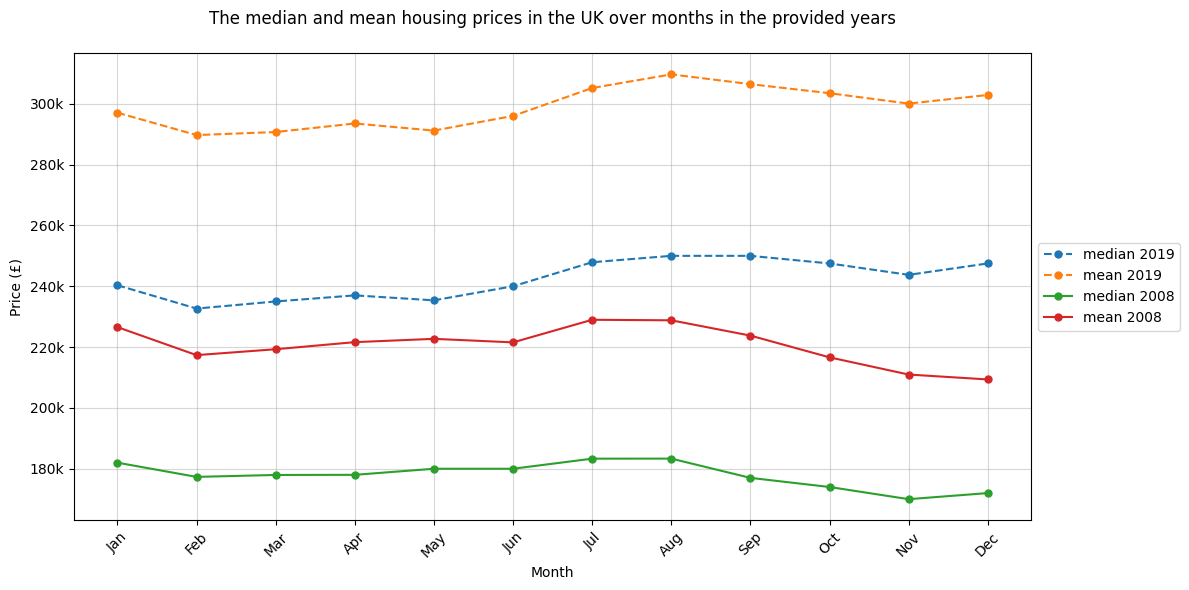

In [16]:
house_da.plot_house_prices_comparison()

In [17]:
# selects esher, woodstcok, lododn, south shields 
house_da.get_selected_cities_to_plot()

Pickle data loaded correctly from: preload/ pp_1995_2023.pkl


,Price,Date of Transfer,Town/City,Price Group
13,78000,1995-09-29 00:00,LONDON,50k-100k
30,405000,1995-04-07 00:00,LONDON,200k-500k
50,67000,1995-04-24 00:00,LONDON,50k-100k
58,100000,1995-04-27 00:00,LONDON,50k-100k
59,90000,1995-07-26 00:00,LONDON,50k-100k
...,...,...,...,...
28276156,920000,2023-01-19 00:00,LONDON,750k-1m
28276157,890000,2023-01-10 00:00,LONDON,750k-1m
28276158,1180000,2023-01-06 00:00,LONDON,1m-1.5m
28276201,365000,2023-01-11 00:00,LONDON,200k-500k


In [18]:
# cities = list(house_da.selected_cities_data["Town/City"].unique())
# cities_original = cities.copy()
cities = "WOODSTOCK"
cities

'WOODSTOCK'

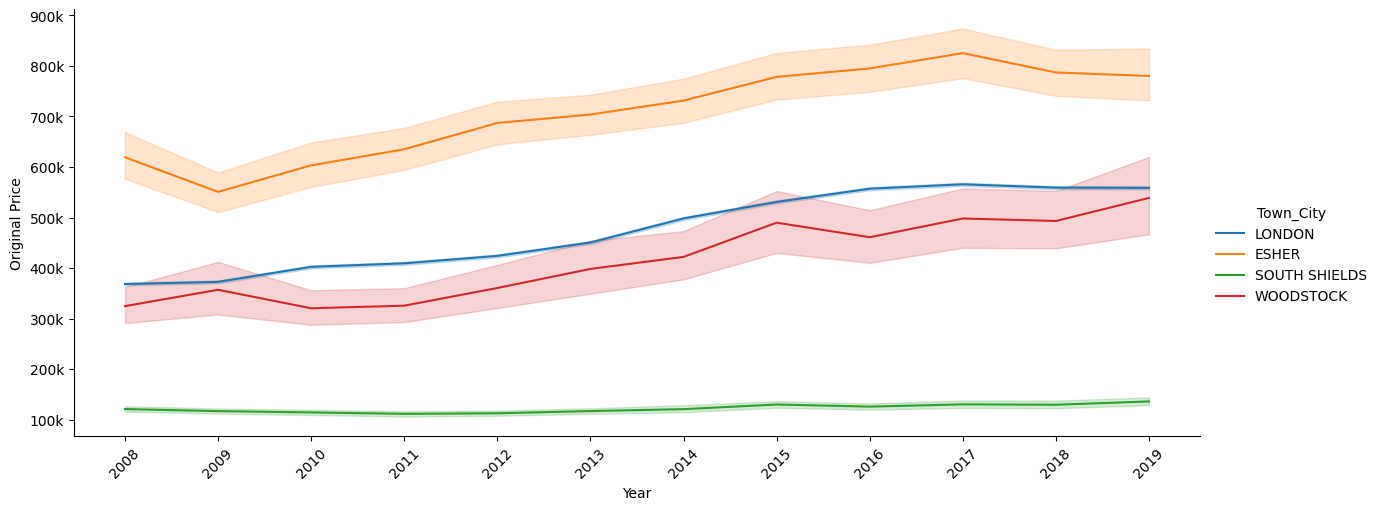

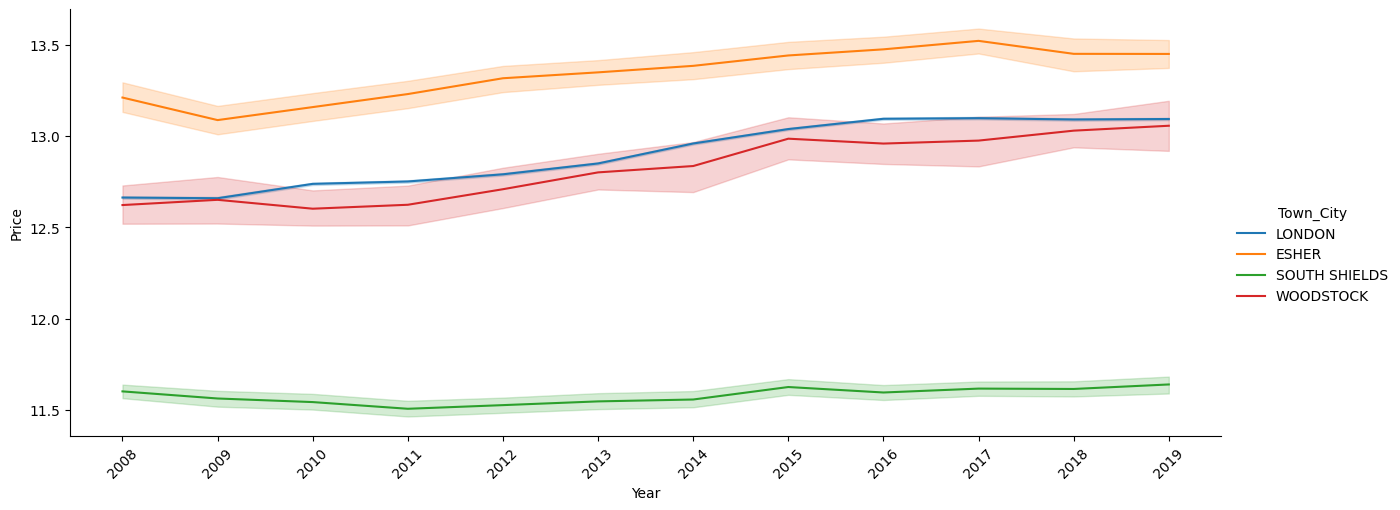

In [19]:
house_da.plot_cities_data()

Create timeline graph with key events UK

In [20]:
house_da.plot_city_prices()

     Price  Date of Transfer Town/City Price Group
13   78000  1995-09-29 00:00    LONDON    50k-100k
30  405000  1995-04-07 00:00    LONDON   200k-500k
50   67000  1995-04-24 00:00    LONDON    50k-100k
58  100000  1995-04-27 00:00    LONDON    50k-100k
59   90000  1995-07-26 00:00    LONDON    50k-100k


## Part 3 - Data Analysis - Plotting

In [21]:
house_da = HousingDataAnalysis(house_data)
temp_house_da = HousingDataAnalysis(temp_house_data)

In [22]:
#Count the number of entries in each price group for each year
price_group_counts = house_da.count_price_groups()
price_group_counts_temp = temp_house_da.count_price_groups()

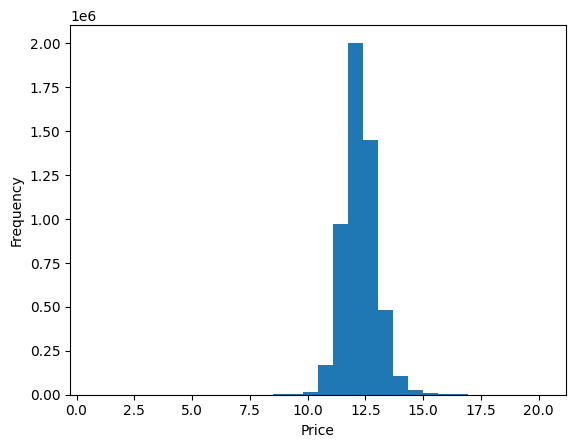

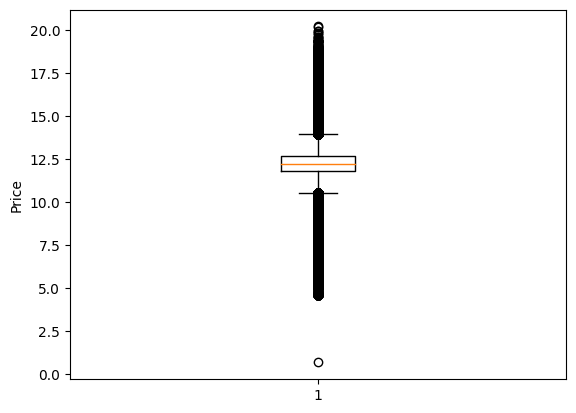

Skewness: 0.36474120686657036
Kurtosis: 4.560066275894331


In [23]:
house_da.show_price_distribution()

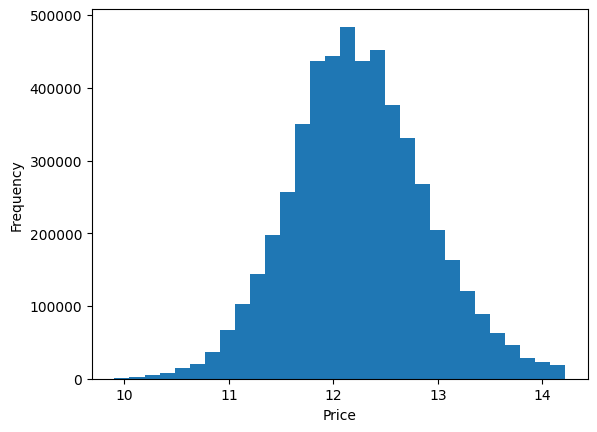

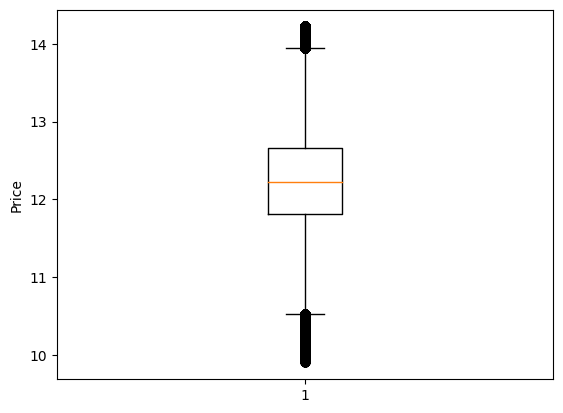

Skewness: 0.14312498619150793
Kurtosis: 0.08422103789473301


In [24]:
temp_house_da.show_price_distribution()

In [25]:
merged_df_house_data_log = house_da.calculate_quartiles('Price')
merged_df_house_data = house_da.calculate_quartiles('Original Price')
merged_df_temp_house_data_log = temp_house_da.calculate_quartiles('Price')
merged_df_temp_house_data = temp_house_da.calculate_quartiles('Original Price')

In [26]:
merged_df_house_data_log = house_da.calculate_quartiles('Price')
merged_df_house_data = house_da.calculate_quartiles('Original Price')
merged_df_temp_house_data_log = temp_house_da.calculate_quartiles('Price')
merged_df_temp_house_data = temp_house_da.calculate_quartiles('Original Price')

In [27]:
merged_df_house_data_log

,count,mean,std,min,25%,50%,75%,max,Year,Skewness,Kurtosis,q1_count,q2_count,q3_count,q4_count
0,361026.0,12.136516,0.600011,6.255750,11.736077,12.095147,12.449023,16.972511,2008.0,0.551745,1.757022,92717,88162,89963,90184
1,355955.0,12.100249,0.603106,5.620401,11.727642,12.058158,12.429220,16.440179,2009.0,0.495282,1.519930,88993,89309,93576,84077
2,377323.0,12.169068,0.638773,4.615121,11.744045,12.133507,12.533580,16.600522,2010.0,0.449176,1.250107,94615,94207,94179,94322
3,377802.0,12.141266,0.654115,4.615121,11.728045,12.100718,12.506181,18.108789,2011.0,0.452888,1.417690,95120,94678,93793,94211
4,381122.0,12.157878,0.655183,5.993961,11.736077,12.122696,12.524530,17.822098,2012.0,0.470394,1.457534,98439,92489,94934,95260
5,432134.0,12.186385,0.687927,4.615121,11.736077,12.141539,12.561977,18.362952,2013.0,0.625833,2.599786,108163,108037,107900,108034
6,487645.0,12.248657,0.724183,4.615121,11.788669,12.206078,12.652363,18.702093,2014.0,0.690924,3.193926,121939,123926,120193,121587
7,492661.0,12.307903,0.738366,4.615121,11.835016,12.278398,12.729324,19.231611,2015.0,0.598197,3.274486,123622,123951,121983,123105
8,498096.0,12.351103,0.772960,0.693147,11.870519,12.332710,12.793862,19.729014,2016.0,0.236581,4.691130,124525,124559,125149,123863
9,506630.0,12.392608,0.820035,4.615121,11.911708,12.383176,12.841328,20.202895,2017.0,-0.016513,6.222764,127033,126363,126754,126480


In [28]:
merged_df_house_data

,count,mean,std,min,25%,50%,75%,max,Year,Skewness,Kurtosis,q1_count,q2_count,q3_count,q4_count
0,361026.0,230591.231878,2.405197e+05,520.0,125000.0,179000.0,255000.000,23500000.0,2008.0,16.055904,746.849438,92717,88162,89963,90184
1,355955.0,222054.902330,2.178242e+05,275.0,123950.0,172500.0,250000.000,13800000.0,2009.0,11.235434,330.892662,88993,89309,93576,84077
2,377323.0,243739.867305,2.564467e+05,100.0,126000.0,186000.0,277500.000,16200000.0,2010.0,11.588569,328.686183,94615,94207,94179,94322
3,377802.0,240505.106633,2.958033e+05,100.0,124000.0,180000.0,270000.000,73206100.0,2011.0,50.399811,10148.434049,95120,94678,93793,94211
4,381122.0,245377.453401,3.123641e+05,400.0,125000.0,184000.0,275000.000,54959000.0,2012.0,32.991049,3618.088067,98439,92489,94934,95260
5,432134.0,269792.625723,7.245871e+05,100.0,125000.0,187500.0,285493.125,94390560.0,2013.0,56.629998,4789.311678,108163,108037,107900,108034
6,487645.0,305148.396489,1.007988e+06,100.0,131750.0,200000.0,312500.000,132500000.0,2014.0,48.169105,3473.366408,121939,123926,120193,121587
7,492661.0,328822.610328,1.201531e+06,100.0,138000.0,215000.0,337500.000,225000000.0,2015.0,55.048983,5205.411205,123622,123951,121983,123105
8,498096.0,349740.977180,1.383333e+06,1.0,142987.5,227000.0,360000.000,370000000.0,2016.0,91.849816,16225.478634,124525,124559,125149,123863
9,506630.0,389493.362686,2.000328e+06,100.0,149000.0,238750.0,377500.000,594300000.0,2017.0,99.866172,19513.917360,127033,126363,126754,126480


In [29]:
merged_df_temp_house_data_log

,count,mean,std,min,25%,50%,75%,max,Year,Skewness,Kurtosis,q1_count,q2_count,q3_count,q4_count
0,359393.0,12.127475,0.575486,9.928229,11.736077,12.089544,12.434805,14.220976,2008.0,0.374720,0.467047,92558,87260,89728,89847
1,354509.0,12.091902,0.581796,9.915959,11.724005,12.056224,12.429120,14.220976,2009.0,0.320312,0.512684,88634,88623,88632,88620
2,375196.0,12.157043,0.612141,9.928229,11.740064,12.128117,12.524530,14.220976,2010.0,0.234867,0.271340,93799,94043,94008,93346
3,375433.0,12.128575,0.623883,9.911836,11.724005,12.100718,12.499368,14.220976,2011.0,0.240315,0.286057,93951,95616,92008,93858
4,378686.0,12.143879,0.623957,9.915959,11.736077,12.117247,12.521495,14.220976,2012.0,0.217315,0.292345,98275,91592,94150,94669
5,428049.0,12.165146,0.636938,9.907679,11.736077,12.134851,12.549666,14.220976,2013.0,0.197205,0.262435,107836,106215,107006,106992
6,481364.0,12.218860,0.654514,9.915466,11.782960,12.196027,12.628070,14.220976,2014.0,0.147589,0.152153,120781,120235,120093,120255
7,485842.0,12.276923,0.664512,9.906633,11.831205,12.266702,12.706851,14.220976,2015.0,0.080390,0.025259,121481,121572,121796,120993
8,489351.0,12.323272,0.672979,9.907529,11.867104,12.323860,12.768544,14.220976,2016.0,0.014140,-0.028048,122818,123292,120976,122265
9,494850.0,12.364160,0.679239,9.908027,11.908347,12.367345,12.816746,14.220976,2017.0,-0.026210,-0.015934,123796,123838,123508,123708


In [30]:
merged_df_temp_house_data

,count,mean,std,min,25%,50%,75%,max,Year,Skewness,Kurtosis,q1_count,q2_count,q3_count,q4_count
0,359393.0,221194.496832,159143.718443,20500.000000,125000.000,178000.000000,251400.000000,1500000.0,2008.0,2.892471,12.474796,92558,87260,89728,89847
1,354509.0,214020.251776,154784.613803,20250.000000,123500.000,172166.666667,249975.000000,1500000.0,2009.0,2.915484,12.796687,88634,88623,88632,88620
2,375196.0,232021.176081,171053.171242,20500.000000,125499.375,185000.000000,275000.000000,1500000.0,2010.0,2.665933,10.432090,93799,94043,94008,93346
3,375433.0,227354.198783,172087.997978,20166.666667,123500.000,180000.000000,268166.666667,1500000.0,2011.0,2.713353,10.656309,93951,95616,92008,93858
4,378686.0,230668.622675,173546.696736,20250.000000,125000.000,183000.000000,274166.666667,1500000.0,2012.0,2.683493,10.417030,98275,91592,94150,94669
5,428049.0,237448.104292,181178.467566,20083.000000,125000.000,186250.000000,282000.000000,1500000.0,2013.0,2.610441,9.627539,107836,106215,107006,106992
6,481364.0,252823.767379,193831.568670,20240.000000,131000.000,198000.000000,305000.000000,1500000.0,2014.0,2.437411,8.171233,120781,120235,120093,120255
7,485842.0,268697.249583,202858.205607,20062.000000,137475.000,212500.000000,330000.000000,1500000.0,2015.0,2.261929,7.010622,121481,121572,121796,120993
8,489351.0,282033.369426,209948.993964,20080.000000,142500.000,225000.000000,351000.000000,1500000.0,2016.0,2.111051,6.054502,122818,123292,120976,122265
9,494850.0,294470.854377,218542.295283,20090.000000,148500.000,235000.000000,368333.333333,1500000.0,2017.0,2.042063,5.533491,123796,123838,123508,123708


In [31]:
# analysis_house_data.plot_quartiles("Original Price")

In [32]:
# analysis_house_data.plot_quartiles("Price")

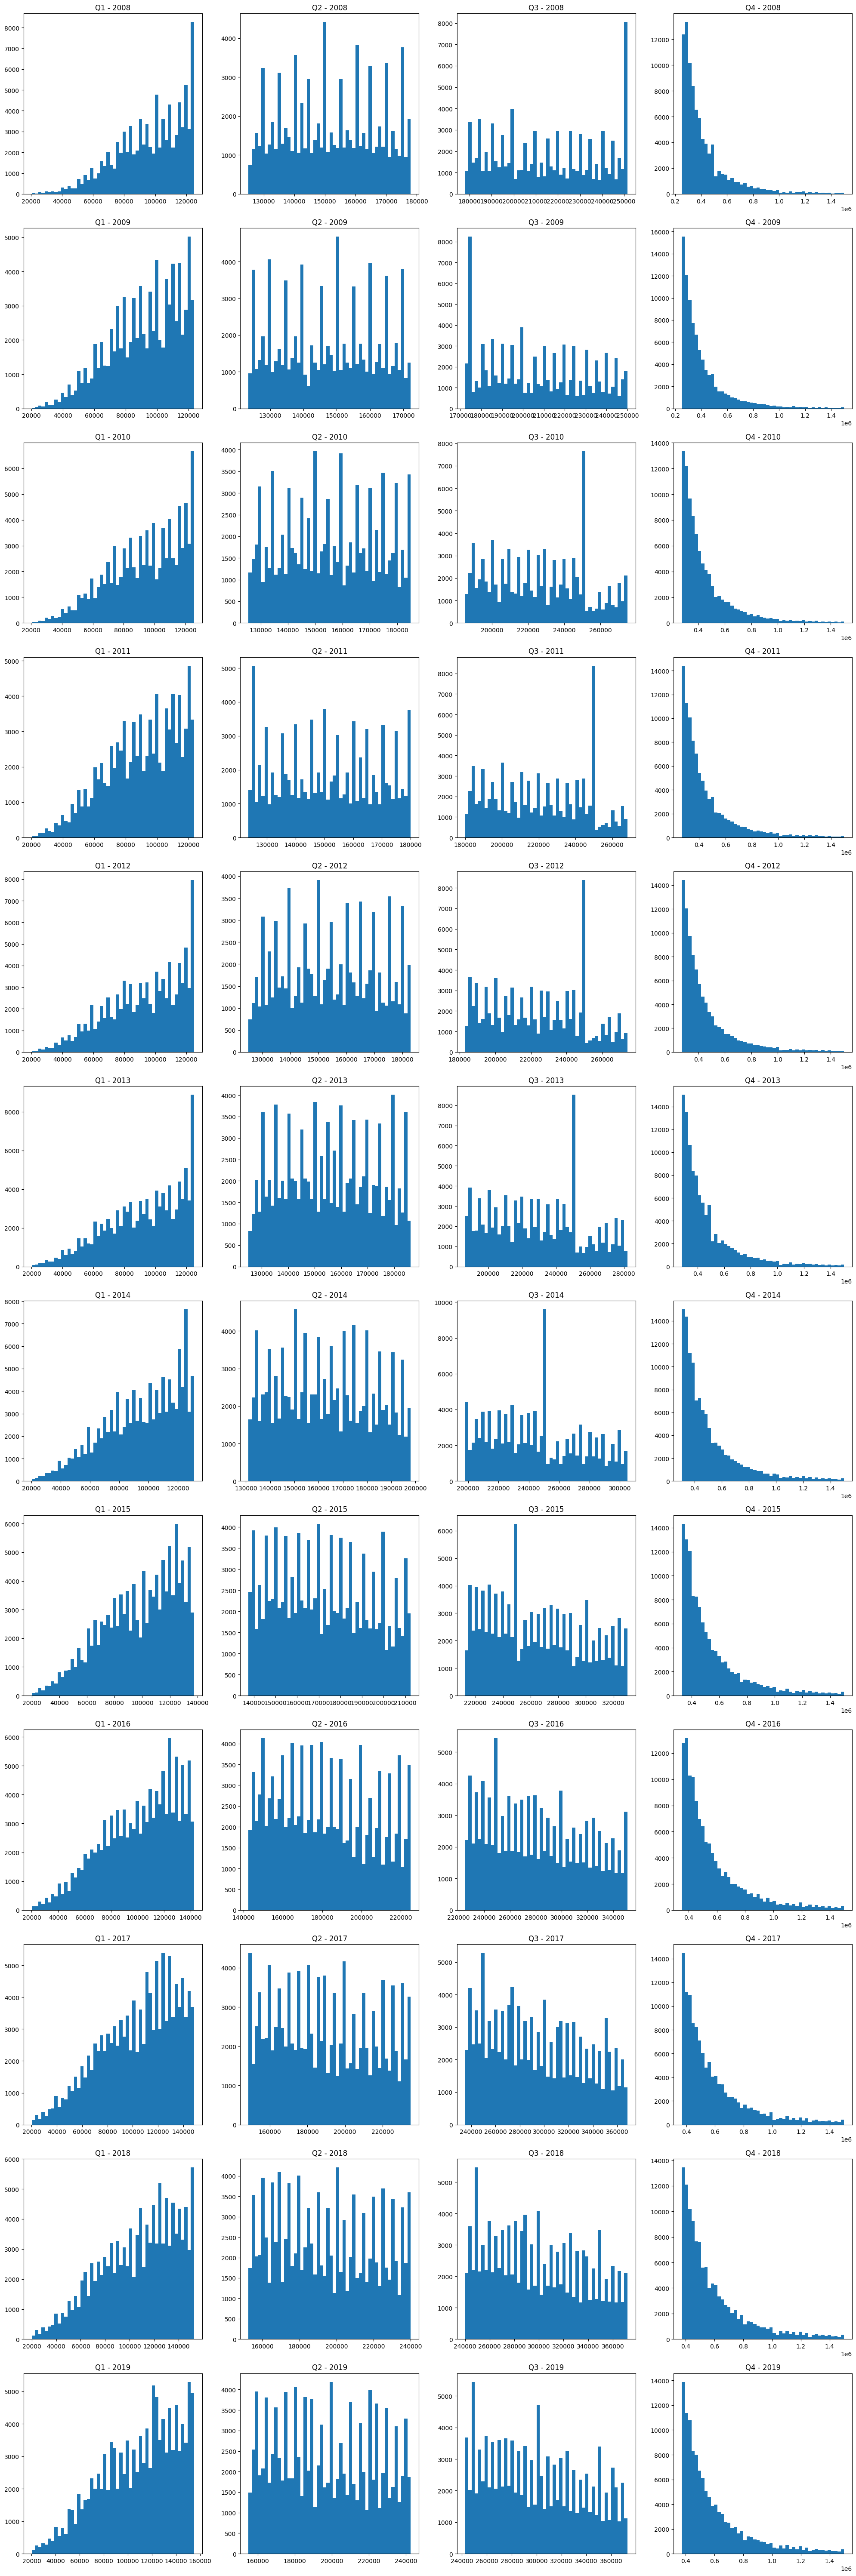

In [33]:
temp_house_da.plot_quartiles("Original Price")

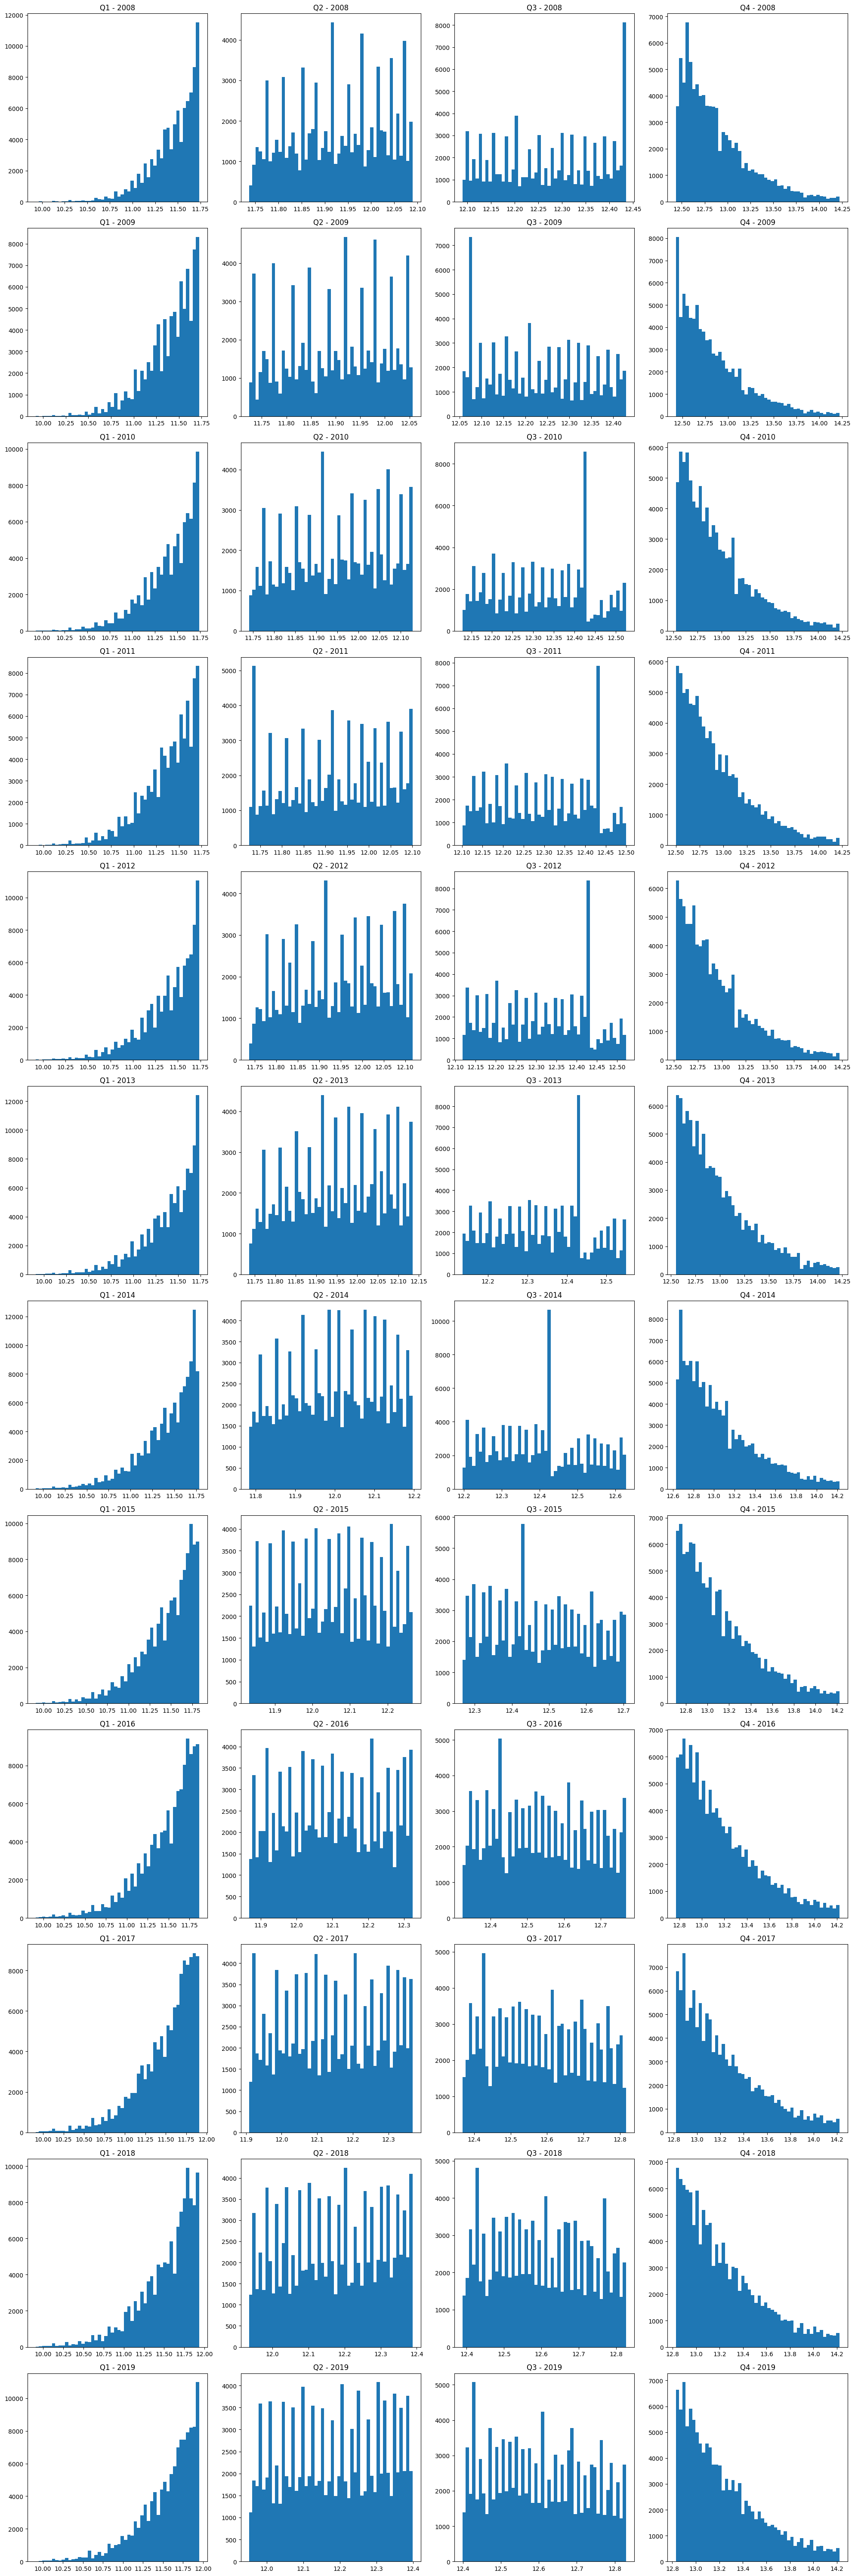

In [34]:
temp_house_da.plot_quartiles("Price")

In [35]:
price_group_counts

Price Group,0-5k,5k-20k,20k-50k,50k-100k,100k-200k,200k-500k,500k-750k,750k-1m,1m-1.5m,1.5m-2.5m,2.5m-5m,5m-10m,10m-50m,50m-100m,100m+
Year,,,,,,,,,,,,,,,
2008,21,138,2674,46105,161699,130859,11887,3974,2195,1036,363,61,14,0,0
2009,10,123,4330,49150,164621,119913,10910,3664,1921,954,308,44,7,0,0
2010,4,141,4589,48497,154544,144438,15314,5007,2807,1386,498,84,14,0,0
2011,12,219,5913,52725,156980,137006,14816,5160,2833,1486,535,98,18,1,0
2012,13,151,5827,50524,156463,142348,15176,5425,2923,1518,594,133,26,1,0
2013,25,302,6999,54826,172236,164235,19022,6832,3899,2190,1024,334,190,20,0
2014,67,372,7589,56850,180987,195515,25554,9353,5516,3170,1587,607,441,35,2
2015,138,357,6639,52883,168486,208929,31719,10643,6543,3420,1678,681,484,58,3
2016,544,938,6459,49006,159263,218207,36898,12231,7287,3714,2065,838,593,41,12


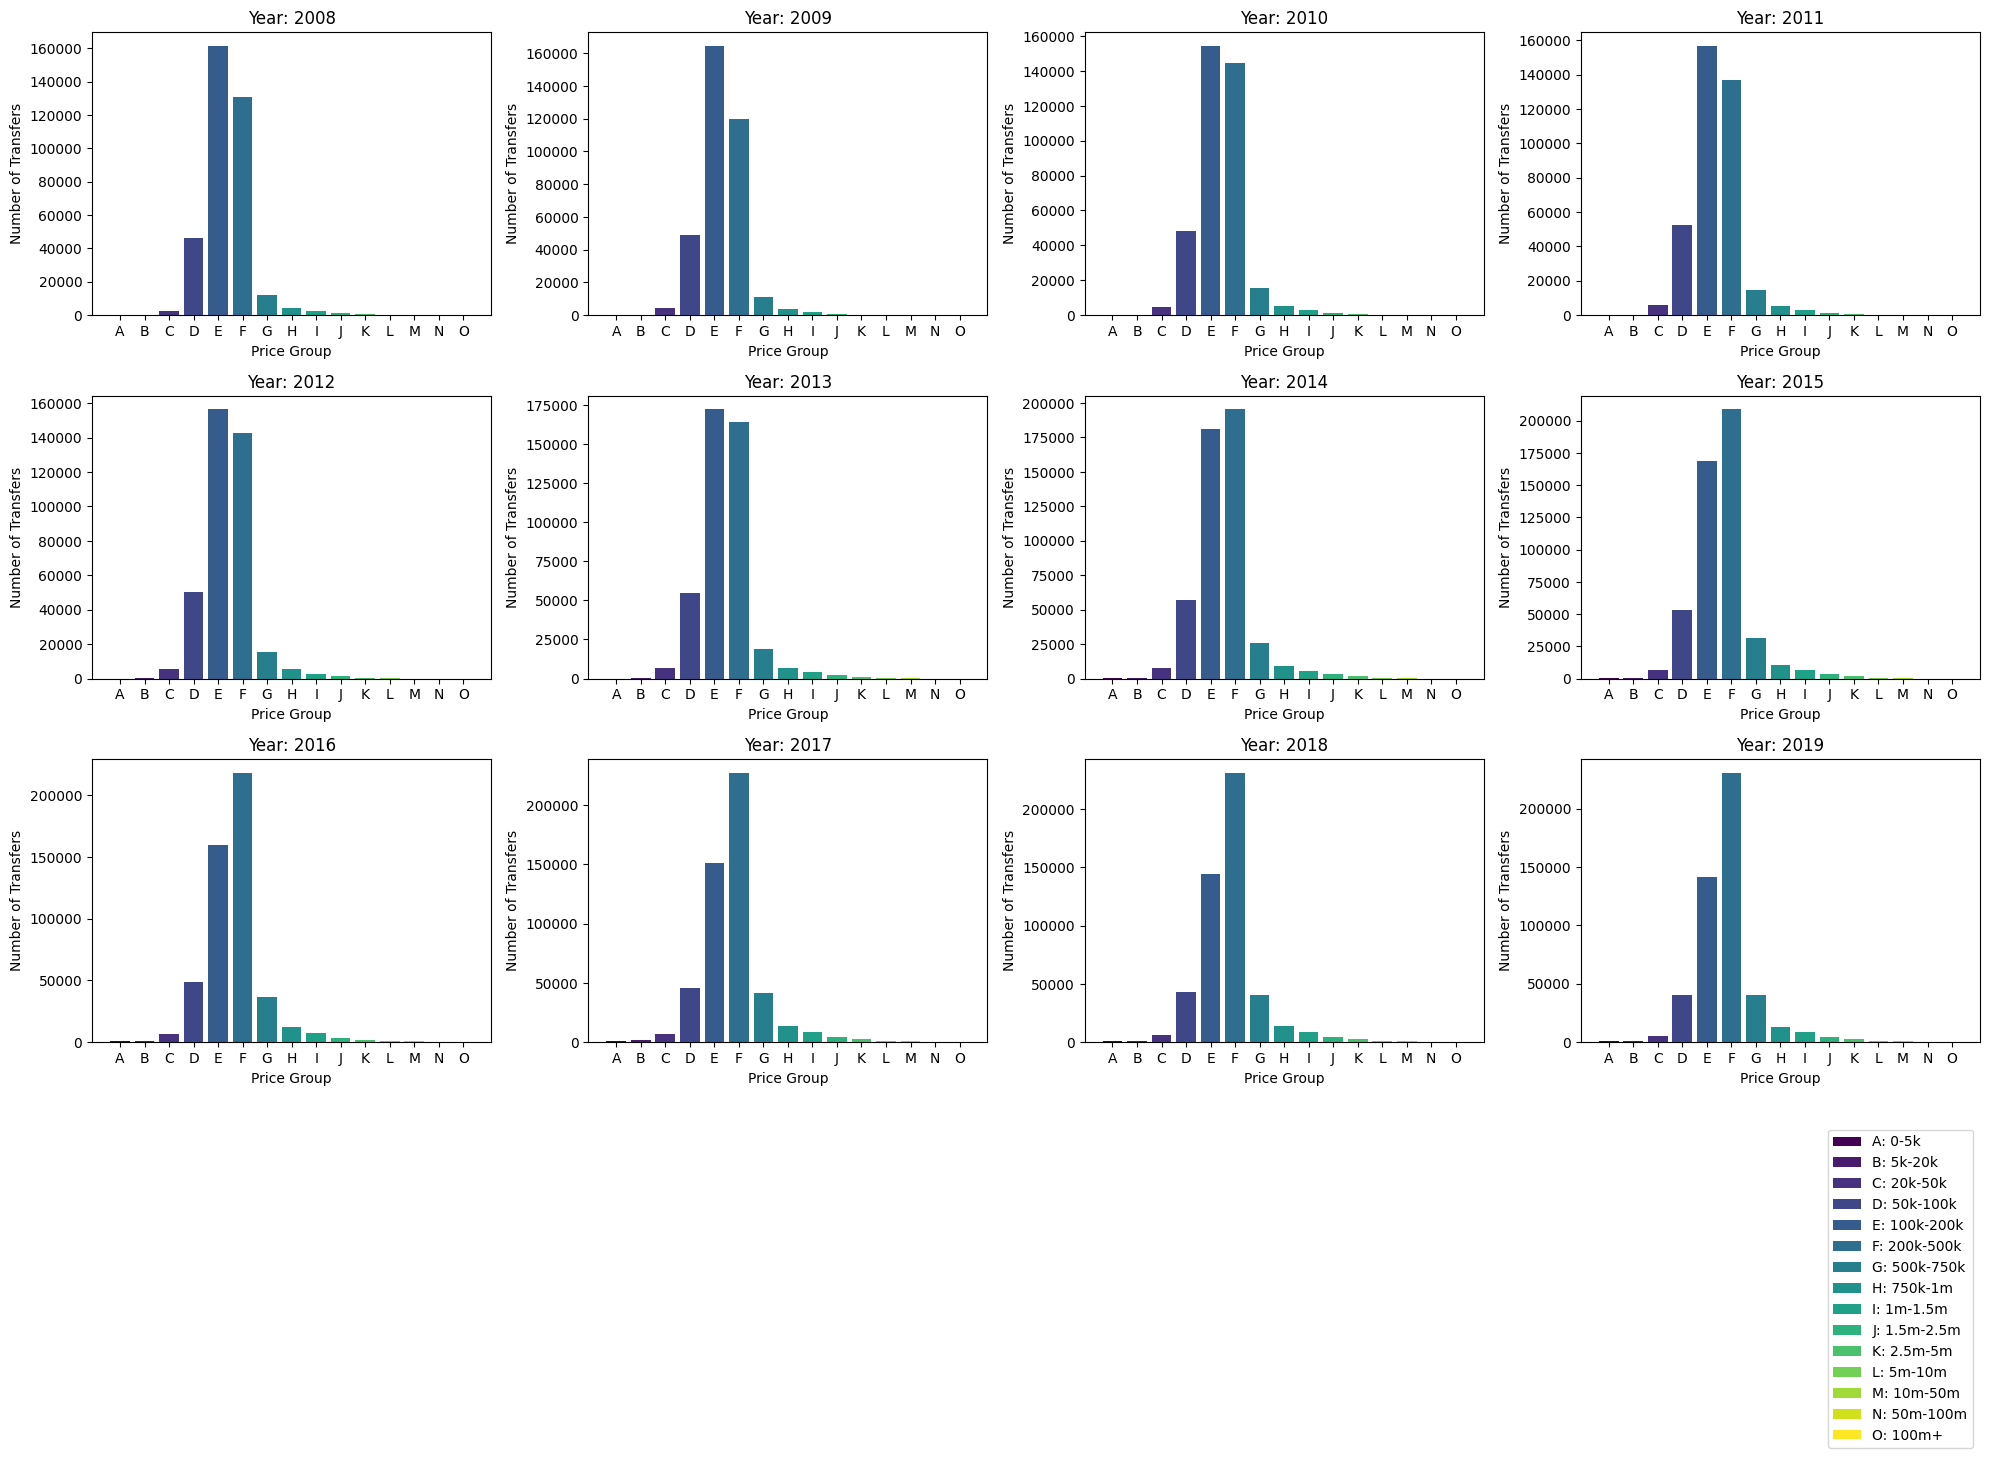

In [36]:
house_da.plot_price_group_counts(price_group_counts)

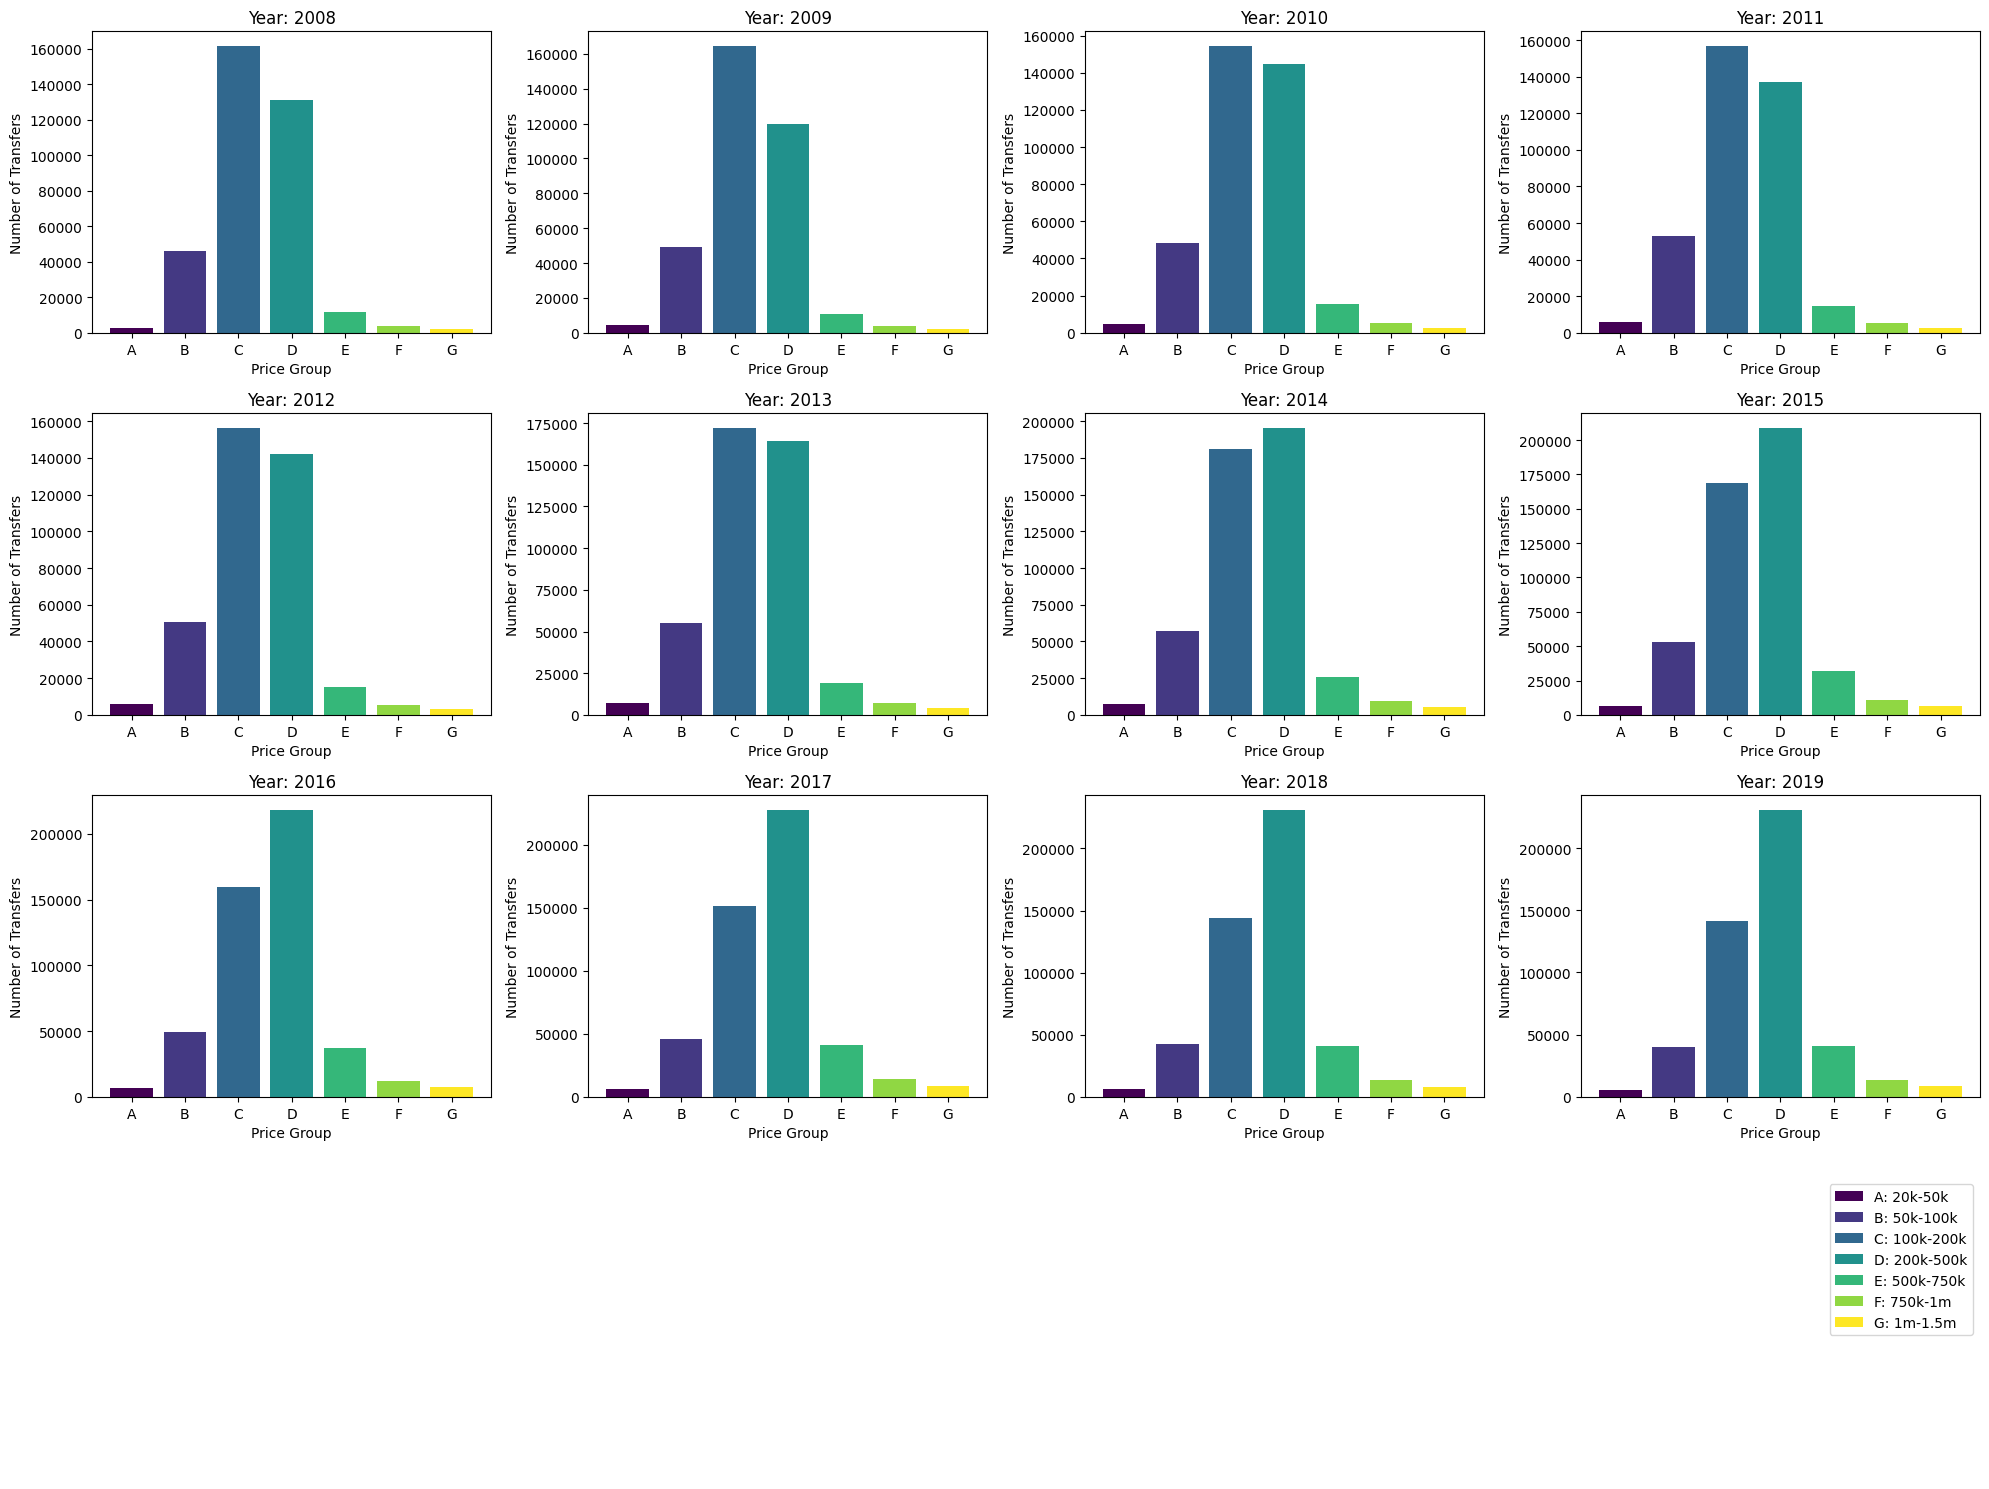

In [38]:
temp_house_da.plot_price_group_counts(price_group_counts, ['20k-50k','50k-100k', '100k-200k', '200k-500k',
'500k-750k', '750k-1m', '1m-1.5m'])

## Part 4 - Cleaning Data

In [158]:
house_data.head()

,Price,Postcode,Old_New,Town_City,County,Year,Month,Property_Type,Postcode_encoded,Avg num of parks,Rate,Inflation rate,Number_of_crimes,Nearest Station <3 km,Nearest Park <3 km,Nearest Airport <20 km,Crimes_Buffer,Original Price,Postcode_prefix,Price Group
8228918,11.456366,B16 8EP,False,BIRMINGHAM,WEST MIDLANDS,2018,6,F,9599,2.342857,0.75,2.3,0.0,1,1,1,1092.0,94500.0,B,50k-100k
1904956,12.441149,B16 8EY,False,BIRMINGHAM,WEST MIDLANDS,2018,8,F,9606,4.666667,0.75,2.3,0.0,1,1,1,1092.0,253000.0,B,200k-500k
1892182,11.915058,B16 8EQ,False,BIRMINGHAM,WEST MIDLANDS,2018,11,F,9600,4.784615,0.75,2.3,364.0,1,1,1,1092.0,149500.0,B,100k-200k
5607563,11.923385,B16 8EX,False,BIRMINGHAM,WEST MIDLANDS,2018,1,F,9605,2.342857,0.75,2.3,0.0,1,1,1,1092.0,150750.0,B,100k-200k
1897828,11.002117,B16 8EW,False,BIRMINGHAM,WEST MIDLANDS,2018,10,F,9604,2.342857,0.75,2.3,0.0,1,1,1,1092.0,60000.0,B,50k-100k


In [159]:
house_data.columns

Index(['Price', 'Postcode', 'Old_New', 'Town_City', 'County', 'Year', 'Month',
       'Property_Type', 'Postcode_encoded', 'Avg num of parks', 'Rate',
       'Inflation rate', 'Number_of_crimes', 'Nearest Station <3 km',
       'Nearest Park <3 km', 'Nearest Airport <20 km', 'Crimes_Buffer',
       'Original Price', 'Postcode_prefix', 'Price Group'],
      dtype='object')

In [160]:
temp_house_data.head()

,Price,Postcode,Old_New,Town_City,County,Year,Month,Property_Type,Postcode_encoded,Avg num of parks,Rate,Inflation rate,Number_of_crimes,Nearest Station <3 km,Nearest Park <3 km,Nearest Airport <20 km,Crimes_Buffer,Original Price,Postcode_prefix,Price Group
8228918,11.456366,B16 8EP,False,BIRMINGHAM,WEST MIDLANDS,2018,6,F,9599,2.342857,0.75,2.3,0.0,1,1,1,1092.0,94500.0,B,50k-100k
1904956,12.441149,B16 8EY,False,BIRMINGHAM,WEST MIDLANDS,2018,8,F,9606,4.666667,0.75,2.3,0.0,1,1,1,1092.0,253000.0,B,200k-500k
1892182,11.915058,B16 8EQ,False,BIRMINGHAM,WEST MIDLANDS,2018,11,F,9600,4.784615,0.75,2.3,364.0,1,1,1,1092.0,149500.0,B,100k-200k
5607563,11.923385,B16 8EX,False,BIRMINGHAM,WEST MIDLANDS,2018,1,F,9605,2.342857,0.75,2.3,0.0,1,1,1,1092.0,150750.0,B,100k-200k
1897828,11.002117,B16 8EW,False,BIRMINGHAM,WEST MIDLANDS,2018,10,F,9604,2.342857,0.75,2.3,0.0,1,1,1,1092.0,60000.0,B,50k-100k


In [161]:
temp_house_data.columns

Index(['Price', 'Postcode', 'Old_New', 'Town_City', 'County', 'Year', 'Month',
       'Property_Type', 'Postcode_encoded', 'Avg num of parks', 'Rate',
       'Inflation rate', 'Number_of_crimes', 'Nearest Station <3 km',
       'Nearest Park <3 km', 'Nearest Airport <20 km', 'Crimes_Buffer',
       'Original Price', 'Postcode_prefix', 'Price Group'],
      dtype='object')

In [162]:
price_mean = house_data["Original Price"].mean()
price_median = house_data["Original Price"].median()

print('Mean:', price_mean)
print("Median:", price_median)

Mean: 309919.60357081704
Median: 205000.0


In [163]:
house_data["Original Price"].describe()

count    5.259207e+06
mean     3.099196e+05
std      1.342693e+06
min      1.000000e+00
25%      1.349500e+05
50%      2.050000e+05
75%      3.200000e+05
max      5.943000e+08
Name: Original Price, dtype: float64

In [164]:
house_data["Original Price"].skew()

127.04057677584198

In [165]:
house_data["Price"].skew()

0.36474120686657036

In [166]:
temp_house_data["Original Price"].skew()

2.3610392323776233

In [167]:
temp_house_data["Price"].skew()

0.14312498619150793

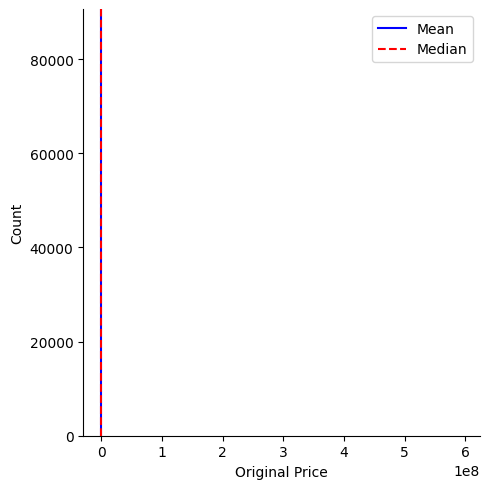

In [168]:
house_da.plot_price_distribution("Original Price")

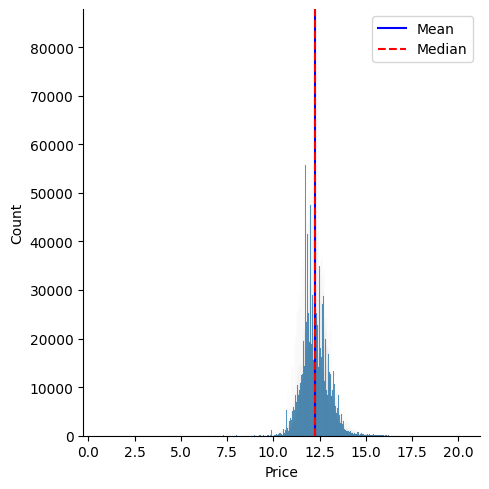

In [169]:
house_da.plot_price_distribution("Price")

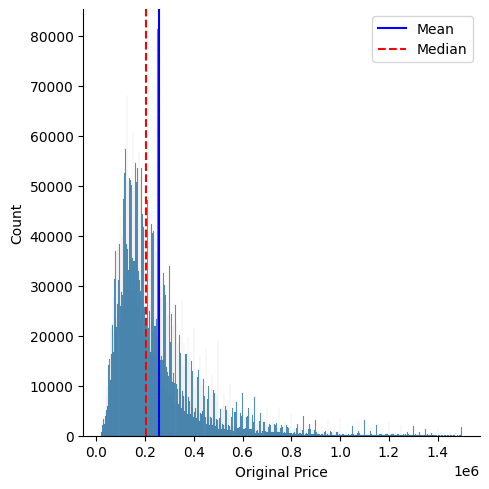

In [170]:
temp_house_da.plot_price_distribution("Original Price")

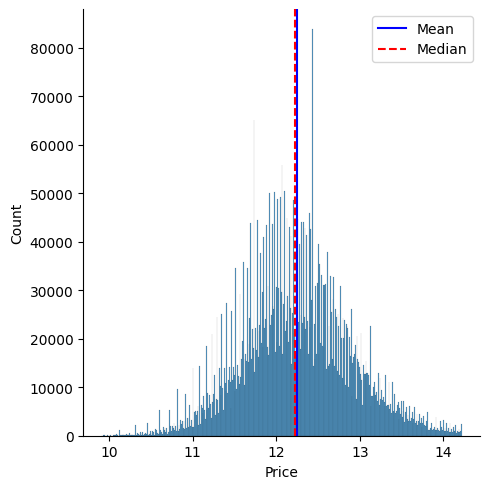

In [171]:
temp_house_da.plot_price_distribution("Price")

In [172]:
model_data = temp_house_da.get_model_data()
model_data.head()

,Price,Old_New,Town_City,County,Year,Month,Postcode_encoded,Avg num of parks,Rate,Inflation rate,Number_of_crimes,Nearest Station <3 km,Nearest Park <3 km,Nearest Airport <20 km,Crimes_Buffer,Property_Type_is__D,Property_Type_is__F,Property_Type_is__O,Property_Type_is__S,Property_Type_is__T
8228918,11.456366,0,0.0,0.0,2018,6,9599,2.342857,0.75,2.3,0.0,1,1,1,1092.0,0,1,0,0,0
1904956,12.441149,0,0.0,0.0,2018,8,9606,4.666667,0.75,2.3,0.0,1,1,1,1092.0,0,1,0,0,0
1892182,11.915058,0,0.0,0.0,2018,11,9600,4.784615,0.75,2.3,364.0,1,1,1,1092.0,0,1,0,0,0
5607563,11.923385,0,0.0,0.0,2018,1,9605,2.342857,0.75,2.3,0.0,1,1,1,1092.0,0,1,0,0,0
1897828,11.002117,0,0.0,0.0,2018,10,9604,2.342857,0.75,2.3,0.0,1,1,1,1092.0,0,1,0,0,0


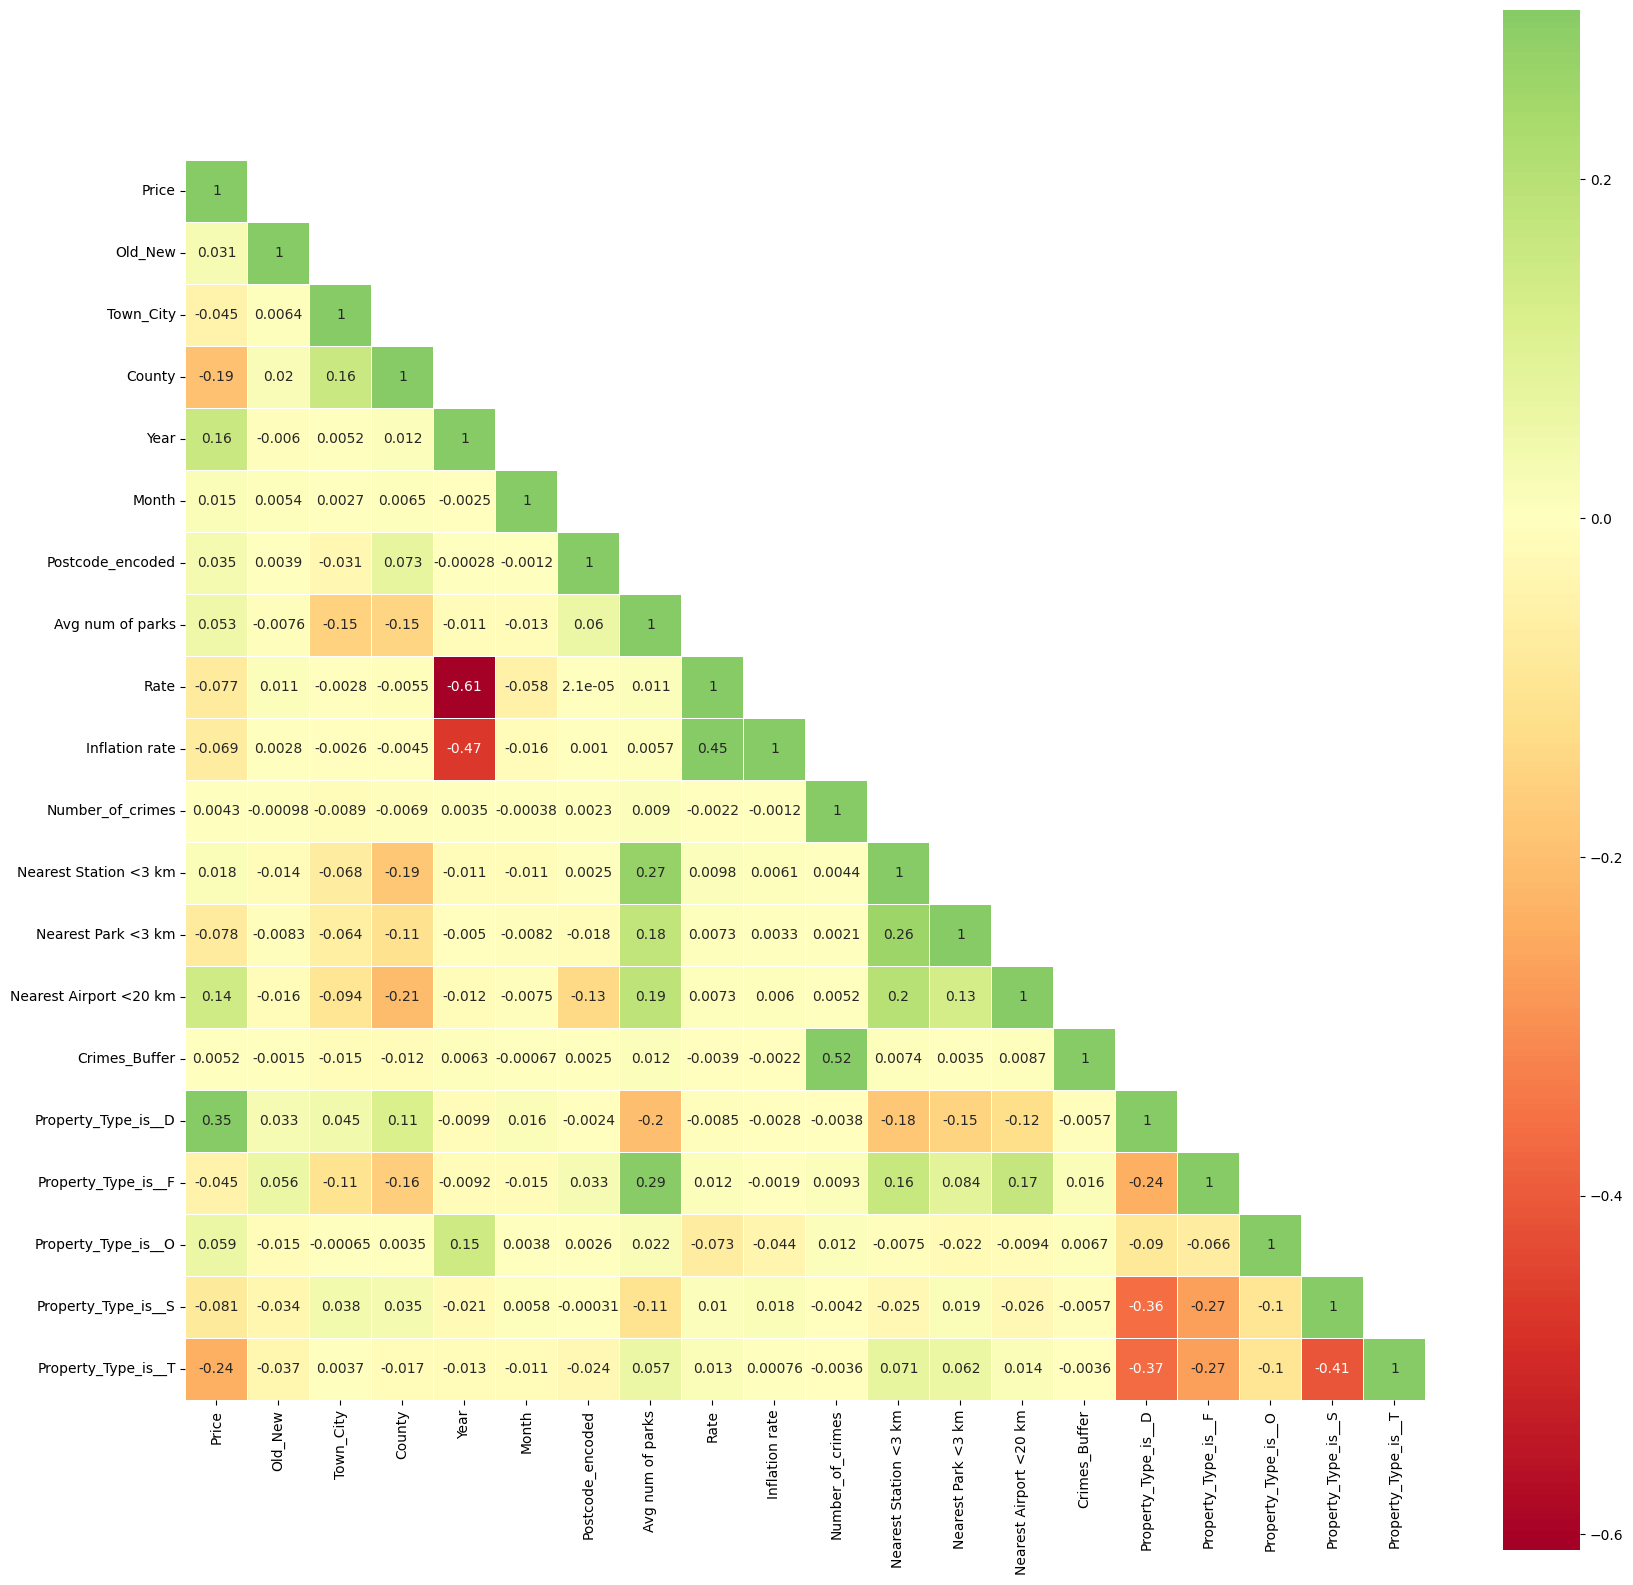

In [173]:
# Call the function
temp_house_da.plot_correlation_heatmap(model_data)

In [174]:
# Model data - to be saved
#temp_house_da.cache_data(model_data, "model_data.pkl")

## Part 5 - Models

In [4]:
model_data = house_da.load_cached_data("model_data.pkl")

Pickle data loaded correctly from: preload/ model_data.pkl
